In [294]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as smapi
import statsmodels.graphics as smgraphics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [295]:
# Load Linear Train Data
linear_data = []
linear_labels = []
with open('linear/train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # To avoid bad data
        if row['x'] and row['y']:
            linear_data.append(float(row['x']))
            linear_labels.append(float(row['y']))

In [296]:
#Plot original data
def plot_data(data, labels):
    plt.plot(data, labels, 'bo')
    
#Plot anomalies
def plot_anomalies_data(data, labels, anomalies_data, anomalies_labels):
    plt.plot(anomalies_data, anomalies_labels, 'ro')
    plt.plot(data, labels, 'bo')
    plt.show()

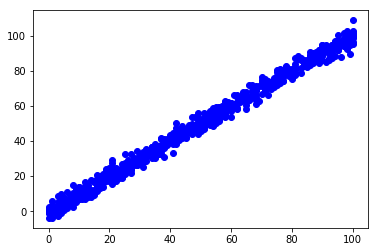

In [297]:
plot_data(linear_data, linear_labels)

In [298]:
#Generate random point
#def generate_random_point(min_val, max_val):
#   return random.uniform(min_val, max_val)

#Add random points to the data
def add_random_points(number, dataset, label):
    res_data = dataset
    res_label = label
    maxX = max(dataset)
    minX = min(dataset)
    maxY = max(label)
    minY = min(label)
    random_points_x = np.random.uniform(low=minX, high=maxX, size=(number,))
    random_points_y = np.random.uniform(low=minY, high=maxY, size=(number,))
    data = np.concatenate((np.array(res_data), np.array(random_points_x)), axis=0)
    labels = np.concatenate((np.array(res_label), np.array(random_points_y)), axis=0)
    return data, labels

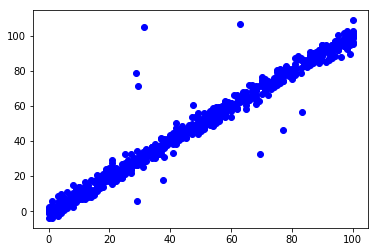

In [299]:
#Add random point to data
dataRand, labelsRand = add_random_points(10, linear_data, linear_labels)
plot_data(dataRand, labelsRand)

In [300]:
data2 = dataRand
labels2 = labelsRand

In [301]:
#Fit model using linear regression
def fit_linear_regression(data, labels):
    regr = linear_model.LinearRegression()
    regr.fit(data[:, np.newaxis], labels)
    predicted_labels = regr.predict(data[:, np.newaxis])
    s = mean_squared_error(labels, predicted_labels)
    return s, predicted_labels

In [302]:
s, predicted_labels = fit_linear_regression(data2, labels2)

In [303]:
#Calculate cooks distance
def get_cooks_distance(data, labels):
    fitted = smapi.OLS(data2, labels2).fit()
    influence = fitted.get_influence()
    #c is the distance and p is p-value
    (c, p) = influence.cooks_distance
    plt.stem(np.arange(len(c)), c, markerfmt=",")
    return c

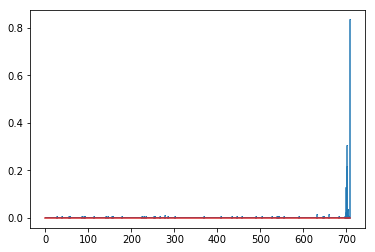

In [304]:
distance = get_cooks_distance(data2, labels2)

In [306]:
def detect_anomalies(data, labels, distance, predicted_labels):
    anomalies = {}
    anomalies_diff = {}
    for i in range(len(data)):
        diff = abs(labels[i] - predicted_labels[i])
        dist_mod = distance
        
#         print('initial: ',distance[i])
        
        if distance[i] < 1:
#             print('less than one')
            string = str(distance[i])
#             print('str: ',string)
            if string.find('-') != -1:
                d = int(string.partition('-')[2])
#                 print('power: ',d)
                dist_mod[i] = distance[i]*(10**d)
            else:
                point_part = str(int(string.partition('.')[2]))
                len_diff = len(string) - len(point_part) - 1
#                 print('power: ',len_diff)
                dist_mod[i] = distance[i]*(10**len_diff)
        
#         print('diff: ',diff)
#         print('dist: ',dist_mod[i])
        
        if diff > dist_mod[i]:
            anomalies[i] = True
            anomalies_diff[i] = int(round(diff - dist_mod[i]))
        else:
            anomalies[i] = False
            
    return anomalies, anomalies_diff

In [307]:
anomalies, anomalies_diff = detect_anomalies(data2, labels2, distance, predicted_labels)

In [308]:
trueA = list(anomalies.values())
print(trueA.count(True))

206


In [314]:
anomalies_diff

{2: 0,
 5: 2,
 10: 1,
 11: 1,
 14: 4,
 19: 3,
 27: 3,
 28: 3,
 34: 1,
 39: 4,
 44: 1,
 45: 1,
 53: 1,
 55: 1,
 56: 3,
 57: 4,
 68: 4,
 70: 1,
 72: 3,
 74: 2,
 75: 1,
 81: 2,
 82: 3,
 86: 2,
 89: 1,
 92: 6,
 98: 2,
 101: 3,
 112: 1,
 122: 1,
 124: 4,
 126: 1,
 130: 3,
 131: 1,
 132: 4,
 133: 3,
 134: 2,
 135: 1,
 136: 0,
 137: 2,
 141: 2,
 144: 0,
 146: 1,
 150: 2,
 152: 3,
 154: 1,
 157: 1,
 158: 1,
 159: 1,
 163: 1,
 166: 1,
 169: 1,
 170: 2,
 172: 1,
 174: 0,
 176: 2,
 177: 3,
 184: 2,
 189: 1,
 196: 2,
 197: 4,
 202: 1,
 204: 4,
 207: 1,
 213: 0,
 221: 0,
 224: 3,
 229: 1,
 231: 1,
 232: 0,
 234: 4,
 235: 3,
 237: 1,
 246: 1,
 253: 4,
 256: 4,
 259: 3,
 263: 2,
 266: 1,
 271: 0,
 272: 3,
 285: 3,
 286: 0,
 290: 1,
 292: 1,
 295: 2,
 300: 1,
 301: 1,
 302: 1,
 303: 5,
 305: 3,
 306: 3,
 309: 2,
 310: 1,
 323: 2,
 325: 0,
 329: 4,
 335: 1,
 338: 0,
 341: 3,
 343: 2,
 358: 2,
 360: 0,
 364: 1,
 370: 1,
 378: 1,
 379: 1,
 384: 0,
 391: 0,
 394: 3,
 396: 0,
 397: 0,
 399: 4,
 403: 0,
 40

In [322]:
from collections import Counter

def get_least_frequent(anomalies,anomalies_diff):
    lst = list(anomalies_diff.values())
    cnt = Counter(lst)
#     mincnt = min(cnt.values())
#     minval = next(n for n in reversed(lst) if cnt[n] == mincnt)
    
    return int(np.mean(list(cnt.values())))

In [323]:
threshold = get_least_frequent(anomalies,anomalies_diff)

In [324]:
data3 = []
labels3 = []
anomalies_data = []
anomalies_labels = []

for i in range(len(data2)):
    if anomalies[i] == True:
        if anomalies_diff[i] > threshold:
            anomalies_data.append(data2[i])
            anomalies_labels.append(labels2[i])
        else: 
            data3.append(data2[i])
            labels3.append(labels2[i])
    elif anomalies[i] == False:
        data3.append(data2[i])
        labels3.append(labels2[i])

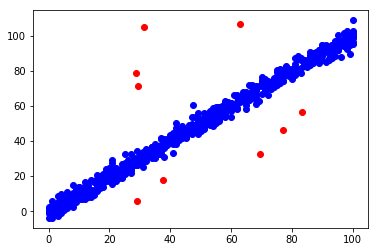

In [325]:
plot_anomalies_data(data3, labels3, anomalies_data, anomalies_labels)

In [330]:
from scipy.interpolate import spline

def anomaly_border(data3, labels3, anomalies_data, anomalies_labels, data2, label_mod):   
    plt.plot(anomalies_data, anomalies_labels, 'ro')
    plt.plot(data3, labels3, 'bo')
    
    xnew = np.linspace(min(data2),max(data2),len(data2))
    label_smooth = spline(data2,label_mod,xnew)
    plt.plot(xnew,label_smooth)
    
    plt.show()

In [331]:
label_mod = []
for i in range(len(labels2)):
    label_mod.append(labels2[i]+threshold)

/Users/subhangiagarwala/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


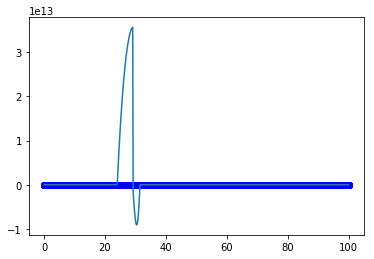

In [332]:
anomaly_border(data3, labels3, anomalies_data, anomalies_labels, data2, label_mod)